<a href="https://colab.research.google.com/github/parthcode22/Credit-Card-deliquency-risk-data-analysis/blob/master/Tata_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/Delinquency_prediction_dataset (2).csv')



In [3]:
df.columns

Index(['Customer_ID', 'Age', 'Income', 'Credit_Score', 'Credit_Utilization',
       'Missed_Payments', 'Delinquent_Account', 'Loan_Balance',
       'Debt_to_Income_Ratio', 'Employment_Status', 'Account_Tenure',
       'Credit_Card_Type', 'Location', 'Month_1', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6'],
      dtype='object')

In [4]:
df.head(10)

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late
5,CUST0006,25,84042.0,700.0,0.650540,6,0,48361.0,0.260688,Unemployed,7,Gold,New York,On-time,Late,Missed,Missed,Missed,Late
6,CUST0007,38,35056.0,354.0,0.390581,3,0,4638.0,0.484265,employed,17,Platinum,New York,On-time,Missed,Missed,Late,Missed,Late
7,CUST0008,56,123215.0,415.0,0.532715,5,0,55776.0,0.358695,EMP,1,Student,New York,On-time,On-time,On-time,Late,Missed,Late
8,CUST0009,36,66991.0,405.0,0.413035,5,1,NaN,0.219854,Employed,12,Student,Phoenix,On-time,On-time,On-time,Missed,Late,On-time
9,CUST0010,40,34870.0,679.0,0.361824,4,0,93922.0,0.333081,EMP,5,Business,Los Angeles,On-time,Missed,Missed,On-time,Missed,Missed


In [5]:
df.isnull().sum()

,0
Customer_ID,0
Age,0
Income,39
Credit_Score,2
Credit_Utilization,0
Missed_Payments,0
Delinquent_Account,0
Loan_Balance,29
Debt_to_Income_Ratio,0
Employment_Status,0


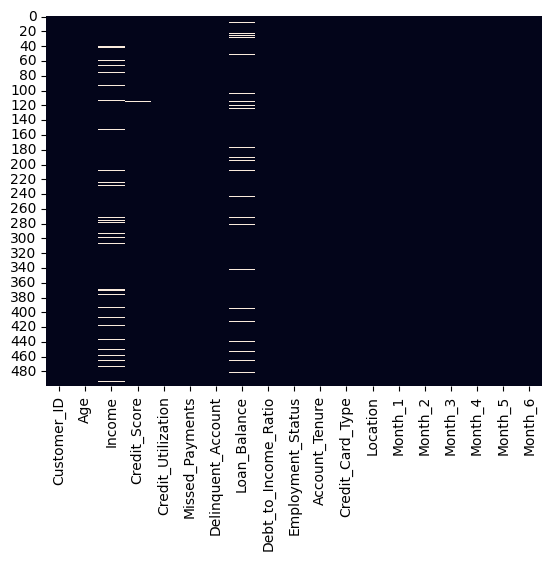

In [6]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()


In [7]:
df['Income_missing'] = df['Income'].isnull().astype(int)
#Create a missingness indicator:

In [8]:
df.columns = df.columns.str.strip()


In [9]:
df['Income_missing'] = df['Income'].isnull().astype(int)


In [10]:
df.groupby('Income_missing')['Loan_Balance'].mean()


,Loan_Balance
Income_missing,
0,48671.516055
1,48441.571429


In [11]:
df.groupby('Income_missing')['Credit_Card_Type'].value_counts(normalize=True)


Income_missing  Credit_Card_Type
0               Gold                0.242950
                Student             0.223427
                Business            0.216920
                Standard            0.169197
                Platinum            0.147505
1               Student             0.230769
                Business            0.205128
                Platinum            0.205128
                Standard            0.205128
                Gold                0.153846
Name: proportion, dtype: float64

<Axes: >

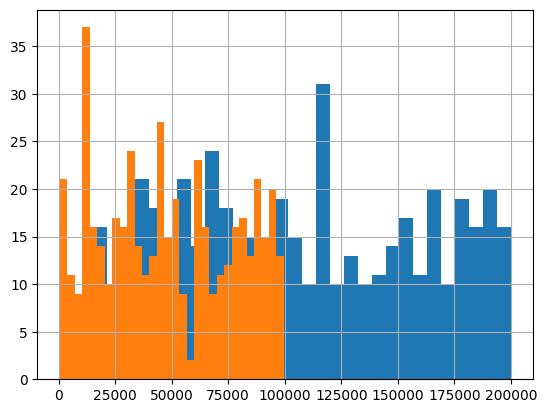

In [12]:
df['Income'].hist(bins=30)
df['Loan_Balance'].hist(bins=30)


In [13]:
df['Income'].fillna(df['Income'].median(), inplace=True)
df['Loan_Balance'].fillna(df['Loan_Balance'].median(), inplace=True)


In [14]:
df['Credit_Score'].fillna(df['Credit_Score'].median(), inplace=True)


In [15]:
df.isnull().sum()

,0
Customer_ID,0
Age,0
Income,0
Credit_Score,0
Credit_Utilization,0
Missed_Payments,0
Delinquent_Account,0
Loan_Balance,0
Debt_to_Income_Ratio,0
Employment_Status,0


In [16]:
#stage 1 cleared

In [17]:
df.describe()

,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Account_Tenure,Income_missing
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000
mean,46.266000,108323.586000,577.750000,0.491446,2.968000,0.160000,48487.480000,0.298862,9.740000,0.07800
std,16.187629,51523.389667,168.543244,0.197103,1.946935,0.366973,28536.522206,0.094521,5.923054,0.26844
min,18.000000,15404.000000,301.000000,0.050000,0.000000,0.000000,612.000000,0.100000,0.000000,0.00000
25%,33.000000,67610.500000,418.750000,0.356486,1.000000,0.000000,24847.000000,0.233639,5.000000,0.00000
50%,46.500000,107658.000000,586.000000,0.485636,3.000000,0.000000,45776.000000,0.301634,10.000000,0.00000
75%,59.250000,152572.250000,725.750000,0.634440,5.000000,0.000000,73809.500000,0.362737,15.000000,0.00000
max,74.000000,199943.000000,847.000000,1.025843,6.000000,1.000000,99620.000000,0.552956,19.000000,1.00000


In [18]:
df['Income'].skew()


np.float64(0.05127463225656534)

In [19]:
#iqr based detection outliers

In [20]:
Q1_Income = df['Income'].quantile(0.25)
Q3_Income = df['Income'].quantile(0.75)
IQR = Q3_Income - Q1_Income


In [21]:
print(f"Q1 (25%): {Q1_Income}")
print(f"Q3 (75%): {Q3_Income}")
print(f"IQR: {IQR}")


Q1 (25%): 67610.5
Q3 (75%): 152572.25
IQR: 84961.75


In [22]:
lower_income = Q1_Income - 1.5 * IQR
upper_income = Q3_Income + 1.5 * IQR
print(f"Lower Bound: {lower_income}")
print(f"Upper Bound: {upper_income}")


Lower Bound: -59832.125
Upper Bound: 280014.875


In [23]:
outliers_income = df[(df['Income'] < lower_income) | (df['Income'] > upper_income)]
print("Income Outliers:", len(outliers_income))

Income Outliers: 0


In [24]:
Q1_Loan = df['Loan_Balance'].quantile(0.25)
Q3_Loan = df['Loan_Balance'].quantile(0.75)
IQR = Q3_Loan - Q1_Loan


In [25]:
print(f"Q1 (25%): {Q1_Loan}")
print(f"Q3 (75%): {Q3_Loan}")
print(f"IQR: {IQR}")


Q1 (25%): 24847.0
Q3 (75%): 73809.5
IQR: 48962.5


In [26]:
lower_loan = Q1_Loan - 1.5 * IQR
upper_loan = Q3_Loan + 1.5 * IQR
print(f"Lower Bound: {lower_loan}")
print(f"Upper Bound: {upper_loan}")


Lower Bound: -48596.75
Upper Bound: 147253.25


In [27]:
outliers_loan = df[(df['Loan_Balance'] < lower_loan) | (df['Loan_Balance'] > upper_loan)]
print("Loan Balance Outliers:", len(outliers_loan))

Loan Balance Outliers: 0


In [28]:
Q1_Miss = df['Missed_Payments'].quantile(0.25)
Q3_Miss = df['Missed_Payments'].quantile(0.75)
IQR = Q3_Miss - Q1_Miss


In [29]:
print(f"Q1 (25%): {Q1_Miss}")
print(f"Q3 (75%): {Q3_Miss}")
print(f"IQR: {IQR}")


Q1 (25%): 1.0
Q3 (75%): 5.0
IQR: 4.0


In [30]:
lower_miss = Q1_Miss - 1.5 * IQR
upper_miss = Q3_Miss + 1.5 * IQR
print(f"Lower Bound: {lower_miss}")
print(f"Upper Bound: {upper_miss}")


Lower Bound: -5.0
Upper Bound: 11.0


In [31]:
outliers_miss = df[(df['Missed_Payments'] < lower_miss) | (df['Missed_Payments'] > upper_miss)]
print("Late Payments Outliers:", len(outliers_miss))

Late Payments Outliers: 0


In [32]:
Q1_Uti = df['Credit_Utilization'].quantile(0.25)
Q3_Uti = df['Credit_Utilization'].quantile(0.75)
IQR = Q3_Uti - Q1_Uti


In [33]:
print(f"Q1 (25%): {Q1_Uti}")
print(f"Q3 (75%): {Q3_Uti}")
print(f"IQR: {IQR}")


Q1 (25%): 0.356486053
Q3 (75%): 0.63444035075
IQR: 0.27795429775


In [34]:
lower_uti = Q1_Uti - 1.5 * IQR
upper_uti = Q3_Uti + 1.5 * IQR
print(f"Lower Bound: {lower_uti}")
print(f"Upper Bound: {upper_uti}")


Lower Bound: -0.06044539362500001
Upper Bound: 1.051371797375


In [35]:
outliers_uti = df[(df['Credit_Utilization'] < lower_uti) | (df['Credit_Utilization'] > upper_uti)]
print("Credit Utilization  Outliers:", len(outliers_uti))

Credit Utilization  Outliers: 0


In [36]:
Q1_Credit = df['Credit_Score'].quantile(0.25)
Q3_Credit = df['Credit_Score'].quantile(0.75)
IQR = Q3_Credit - Q1_Credit


In [37]:
print(f"Q1 (25%): {Q1_Credit}")
print(f"Q3 (75%): {Q3_Credit}")
print(f"IQR: {IQR}")


Q1 (25%): 418.75
Q3 (75%): 725.75
IQR: 307.0


In [38]:
lower_credit = Q1_Credit - 1.5 * IQR
upper_credit = Q3_Credit + 1.5 * IQR
print(f"Lower Bound: {lower_credit}")
print(f"Upper Bound: {upper_credit}")


Lower Bound: -41.75
Upper Bound: 1186.25


In [39]:
outliers_credit = df[(df['Credit_Score'] < lower_credit) | (df['Credit_Score'] > upper_credit)]
print("Credit_Score Outliers:", len(outliers_credit))

Credit_Score Outliers: 0


In [40]:
outliers_income = df[(df['Income'] < lower_income) | (df['Income'] > upper_income)]
outliers_income


,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Income_missing


In [41]:
Q1_Age = df['Age'].quantile(0.25)
Q3_Age = df['Age'].quantile(0.75)
IQR = Q3_Age - Q1_Age


In [42]:
print(f"Q1 (25%): {Q1_Age}")
print(f"Q3 (75%): {Q3_Age}")
print(f"IQR: {IQR}")


Q1 (25%): 33.0
Q3 (75%): 59.25
IQR: 26.25


In [43]:
lower_age = Q1_Age - 1.5 * IQR
upper_age = Q3_Age + 1.5 * IQR
print(f"Lower Bound: {lower_age}")
print(f"Upper Bound: {upper_age}")


Lower Bound: -6.375
Upper Bound: 98.625


In [44]:
outliers_age = df[(df['Age'] < lower_age) | (df['Age'] > upper_age)]
print("Age Outliers:", len(outliers_age))

Age Outliers: 0


In [45]:
#relation between variables

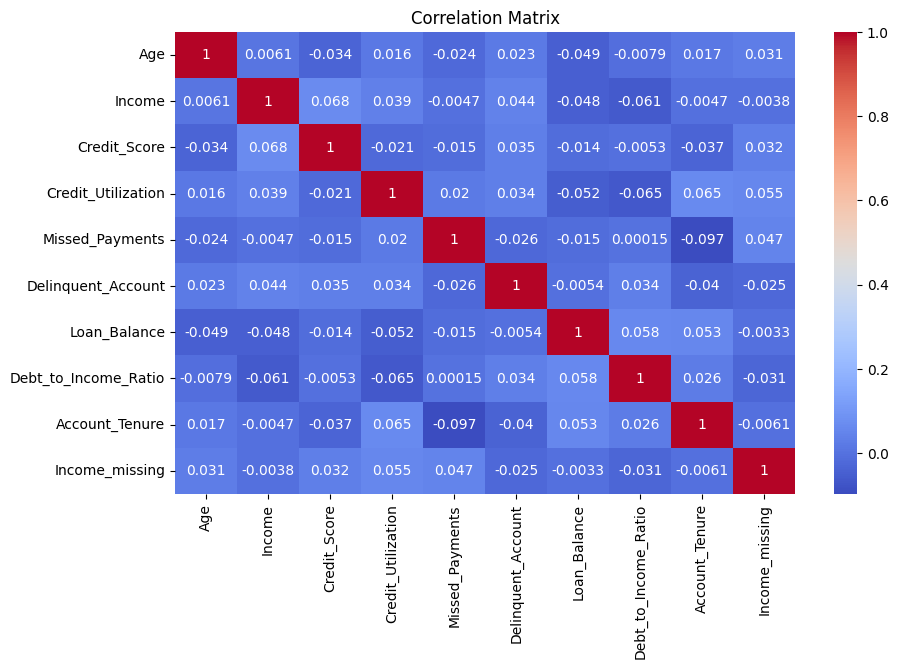

In [46]:
numeric_df = df.select_dtypes(include='number')  # select only numeric columns

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


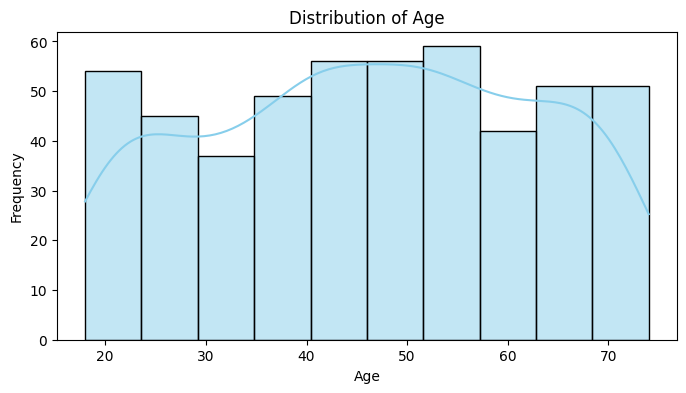

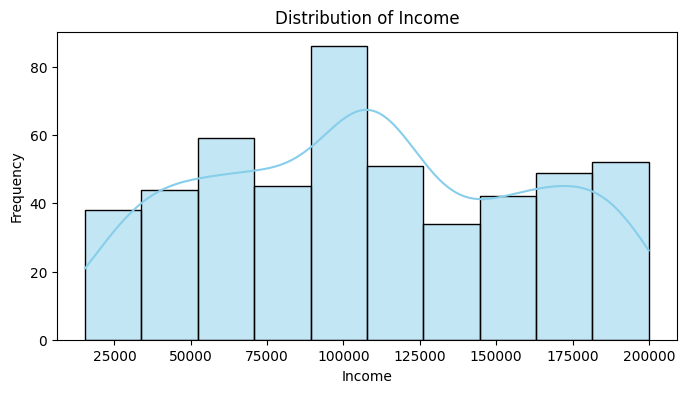

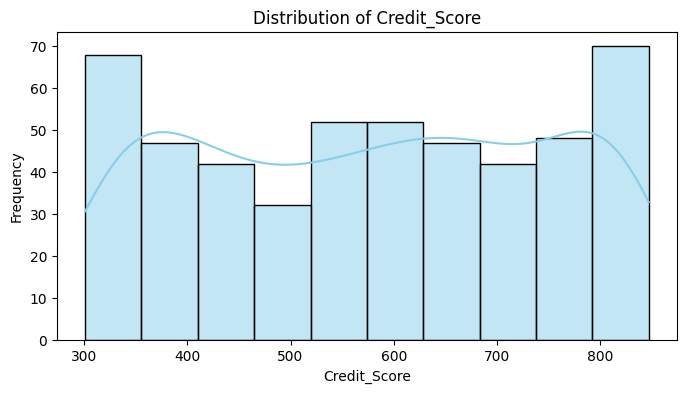

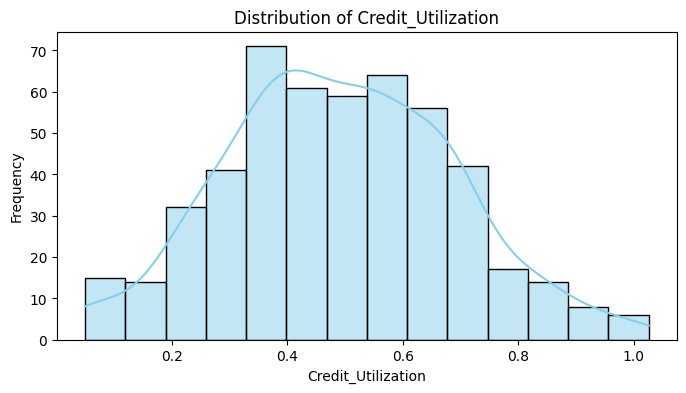

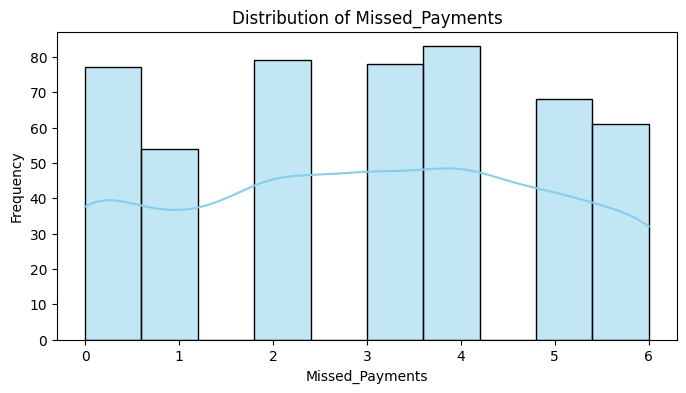

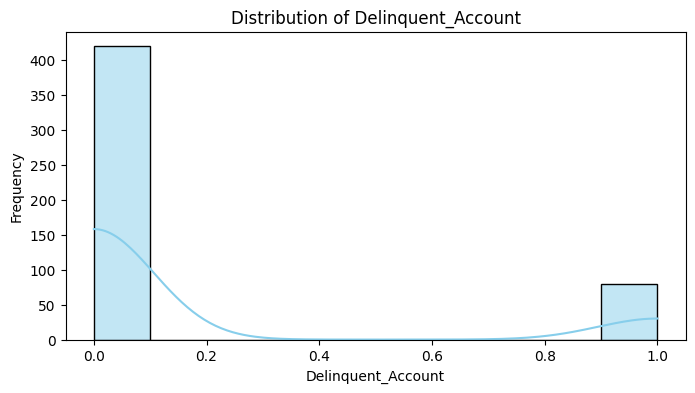

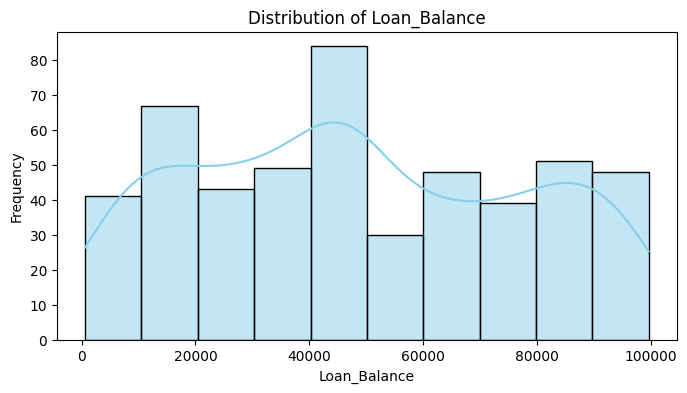

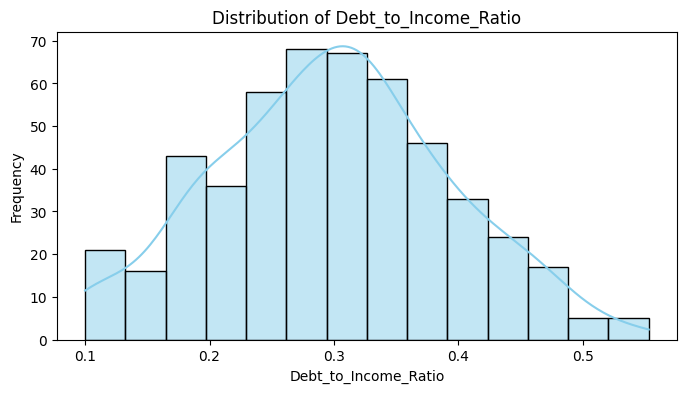

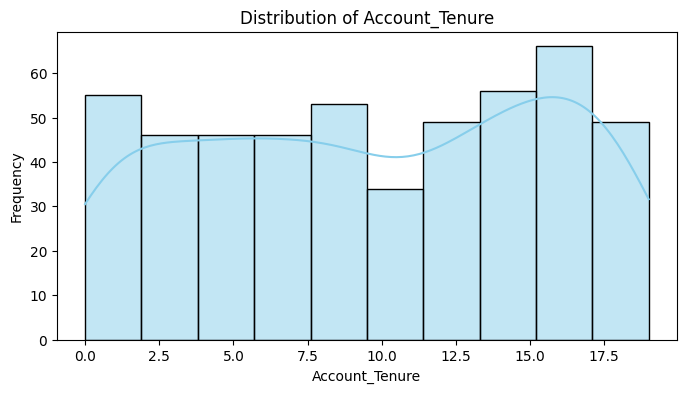

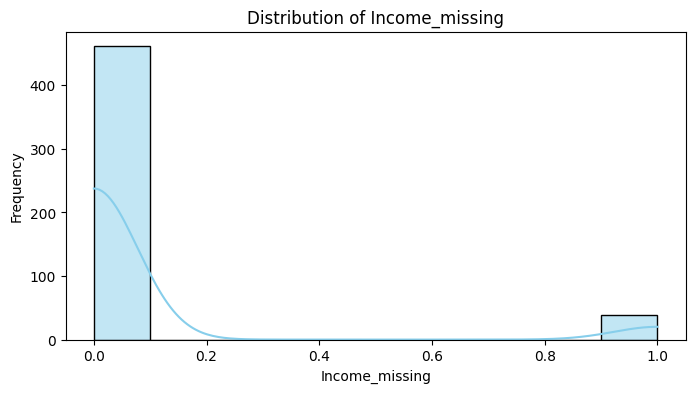

In [47]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [48]:
#step 3 prediction

In [49]:
#identify 3 top feature for prediction

In [50]:
#feature selection and target data preprocessing

In [51]:
# x feature and y feature

In [53]:
# Select top 5 features and target
X = df[['Credit_Score', 'Income', 'Debt_to_Income_Ratio', 'Missed_Payments', 'Credit_Utilization']]
y = df['Delinquent_Account']


In [54]:
#check missing values
X.isnull().sum()


,0
Credit_Score,0
Income,0
Debt_to_Income_Ratio,0
Missed_Payments,0
Credit_Utilization,0


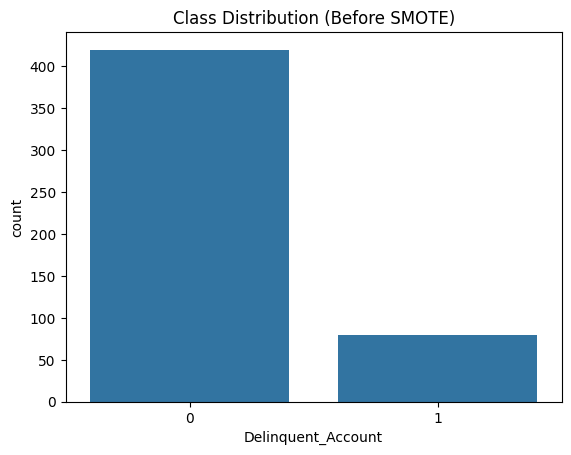

Class distribution:
 Delinquent_Account
0    420
1     80
Name: count, dtype: int64


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of each class
sns.countplot(x=y)
plt.title("Class Distribution (Before SMOTE)")
plt.show()

# Or with value counts
print("Class distribution:\n", y.value_counts())


In [ ]:
#data is highly imbalance we need to balance it using smote analysis

In [58]:
from sklearn.impute import SimpleImputer

# Re-select features (if not already selected)
X = df[['Credit_Score', 'Income', 'Debt_to_Income_Ratio', 'Missed_Payments', 'Credit_Utilization']]
y = df['Delinquent_Account']

# Impute missing values with median
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)


In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42, stratify=y
)
#train test split

In [61]:
#smote
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


In [62]:
# Before SMOTE
print("Before SMOTE (y_train):")
print(y_train.value_counts())

# After SMOTE
print("\nAfter SMOTE (y_train_balanced):")
print(y_train_balanced.value_counts())


Before SMOTE (y_train):
Delinquent_Account
0    336
1     64
Name: count, dtype: int64

After SMOTE (y_train_balanced):
Delinquent_Account
0    336
1    336
Name: count, dtype: int64


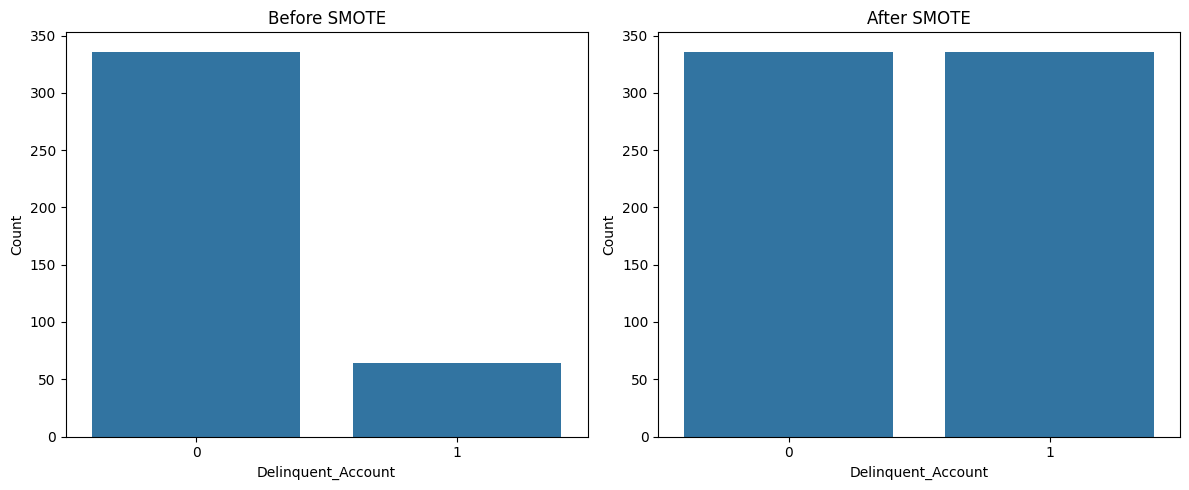

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot before and after SMOTE
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE
sns.countplot(x=y_train, ax=ax[0])
ax[0].set_title("Before SMOTE")
ax[0].set_xlabel("Delinquent_Account")
ax[0].set_ylabel("Count")

# After SMOTE
sns.countplot(x=y_train_balanced, ax=ax[1])
ax[1].set_title("After SMOTE")
ax[1].set_xlabel("Delinquent_Account")
ax[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


In [67]:
!pip install xgboost --quiet

In [68]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix

In [69]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [70]:
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for AUC


In [71]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# F1 Score
f1 = f1_score(y_test, y_pred)

# AUC-ROC Score
auc = roc_auc_score(y_test, y_proba)

# Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("🔹 Accuracy:", accuracy)
print("🔹 F1 Score:", f1)
print("🔹 AUC-ROC Score:", auc)
print("\nClassification Report:\n", report)
print("Confusion Matrix:\n", cm)


🔹 Accuracy: 0.83
🔹 F1 Score: 0.19047619047619047
🔹 AUC-ROC Score: 0.5208333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.91        84
           1       0.40      0.12      0.19        16

    accuracy                           0.83       100
   macro avg       0.63      0.54      0.55       100
weighted avg       0.78      0.83      0.79       100

Confusion Matrix:
 [[81  3]
 [14  2]]


In [72]:
#poor result lets do hyperparameter tuning
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score

# Step 1: Define the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Step 2: Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Step 3: Setup GridSearchCV
grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           scoring='f1',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

# Step 4: Fit on training data
grid_search.fit(X_train, y_train)

# Step 5: Best parameters
print("Best Hyperparameters:\n", grid_search.best_params_)

# Step 6: Use best estimator to predict
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Step 7: Evaluate
print("\n🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("🔹 F1 Score:", f1_score(y_test, y_pred))
print("🔹 AUC-ROC Score:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters:
 {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150, 'subsample': 1.0}

🔹 Accuracy: 0.78
🔹 F1 Score: 0.0
🔹 AUC-ROC Score: 0.46577380952380953

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88        84
           1       0.00      0.00      0.00        16

    accuracy                           0.78       100
   macro avg       0.41      0.46      0.44       100
weighted avg       0.70      0.78      0.74       100

Confusion Matrix:
 [[78  6]
 [16  0]]


In [80]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score

# Step 1: Compute scale_pos_weight
neg, pos = np.bincount(y_train)
scale = neg / pos

# Step 2: Define XGBClassifier with class imbalance handling
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='aucpr',
    use_label_encoder=False,
    scale_pos_weight=scale,
    random_state=42
)

# Step 3: Parameter grid for tuning
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Step 4: StratifiedKFold for balanced validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 5: GridSearchCV with AUC scoring
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv,
    verbose=1,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best estimator
best_model = grid_search.best_estimator_

# Step 6: Evaluate on test set
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Step 7: Print performance metrics
print("Best Hyperparameters:\n", grid_search.best_params_)
print("\n🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("🔹 F1 Score:", f1_score(y_test, y_pred))
print("🔹 AUC-ROC Score:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Hyperparameters:
 {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}

🔹 Accuracy: 0.6
🔹 F1 Score: 0.16666666666666666
🔹 AUC-ROC Score: 0.41517857142857145

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.67      0.74        84
           1       0.12      0.25      0.17        16

    accuracy                           0.60       100
   macro avg       0.47      0.46      0.45       100
weighted avg       0.71      0.60      0.65       100

Confusion Matrix:
 [[56 28]
 [12  4]]


In [82]:
from imblearn.over_sampling import SMOTE

# Assuming X and y are your original features and target
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [83]:
#use neural networking
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# Build the neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_scaled, y_resampled,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=16,
                    callbacks=[early_stop],
                    verbose=0)

# Predict and evaluate
y_pred_probs = model.predict(X_test_scaled).ravel()
y_pred = (y_pred_probs >= 0.5).astype(int)

print("🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("🔹 F1 Score:", f1_score(y_test, y_pred))
print("🔹 AUC-ROC Score:", roc_auc_score(y_test, y_pred_probs))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
🔹 Accuracy: 0.69
🔹 F1 Score: 0.11428571428571428
🔹 AUC-ROC Score: 0.5424107142857143

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        84
           1       0.11      0.12      0.11        16

    accuracy                           0.69       100
   macro avg       0.47      0.46      0.46       100
weighted avg       0.71      0.69      0.70       100


Confusion Matrix:
[[67 17]
 [14  2]]


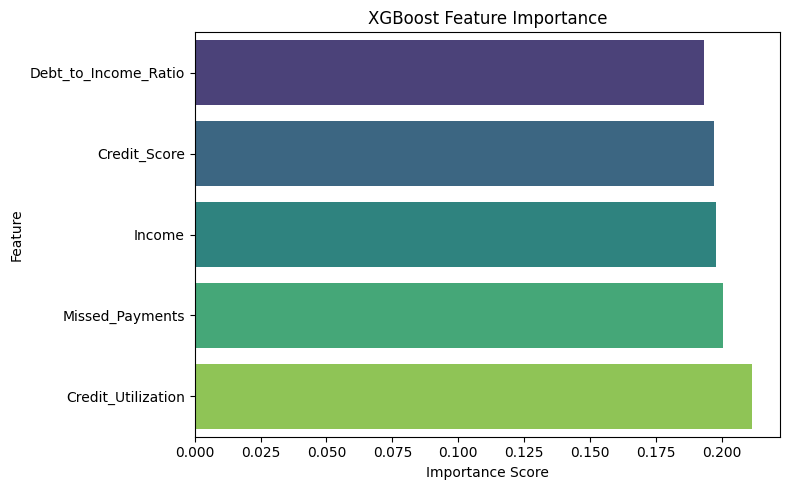

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance

# If your best model is from GridSearch
xgb_best = grid_search.best_estimator_

# OR if you trained a separate XGBoost model manually
# xgb_best = your_trained_xgb_model

# Get feature importances
importances = xgb_best.feature_importances_
feature_names = X.columns  # Make sure X has your 5 selected features

# Create DataFrame for better plotting
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importances_df, palette='viridis')
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
